# Forecasting Exchange Rates Using ARIMA in Python

* References:

[https://medium.com/fintechexplained/forecasting-exchange-rates-using-arima-in-python-f032f313fc56](https://medium.com/fintechexplained/forecasting-exchange-rates-using-arima-in-python-f032f313fc56)

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/learning-stack/Colab-ML-Playbook/blob/master/Forecasting%20Exchange%20Rates/Forecasting_exchange_rates_using_ARIMA.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/learning-stack/Colab-ML-Playbook/blob/master/Forecasting%20Exchange%20Rates/Forecasting_exchange_rates_using_ARIMA.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [1]:
# Implement a if then else condition in Python
message = "We Are Ready To Start"
if ("We Are Ready To Start" == message):
    print("Let's start looking into Python Packages")
    
message = 10
if (12 > message):
    print("Let's start looking into Python Packages")

Let's start looking into Python Packages
Let's start looking into Python Packages


In [2]:
import urllib.request

# Download the file from 'url' and save it locally under `filename`:  
def download(url):
    filename = url.split('/')[-1]
    print ('Downloading', filename)
    f =  urllib.request.urlopen(url)
    data = f.read()
    f.close()
    with open(filename, 'wb') as myfile:
        myfile.write(data)    

# download vocab file
download('https://gist.githubusercontent.com/fintechexplained/ad3962208b165af008e3a03322b4e463/raw/c9118600afb7a904c706dd78d0252cd79a99a06c/exchange.csv')

In [4]:
#import pandas
import pandas as pa
import matplotlib as plot

#get data
def GetData(fileName):
    return pa.read_csv(fileName, header=0, parse_dates=[0], index_col=0)

#read time series from the exchange.csv file 
exchangeRatesSeries = GetData('exchange.csv')

#view top 10 records
exchangeRatesSeries.head(10)

,GBP/USD Close
Date,
1998-12-31,88.67
1999-01-01,88.67
1999-01-04,85.60
1999-01-05,83.95
1999-01-06,86.96
1999-01-07,83.12
1999-01-08,82.37
1999-01-11,77.03
1999-01-12,83.44


In [5]:
#view basic stats information on data
exchangeRatesSeries.describe()

,GBP/USD Close
count,5100.000000
mean,89.732223
std,63.037321
min,17.040000
25%,45.965000
50%,73.315500
75%,94.187500
max,250.280000


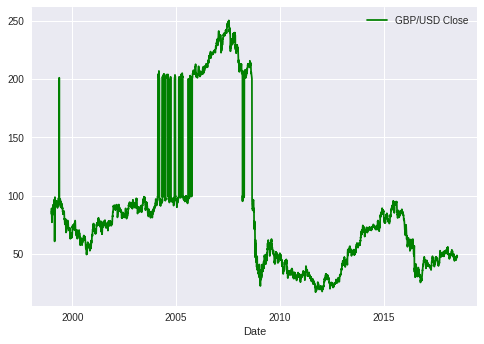

In [6]:
#plot the time series data
exchangeRatesSeries.plot(color='green')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f71caadf748>]],
      dtype=object)

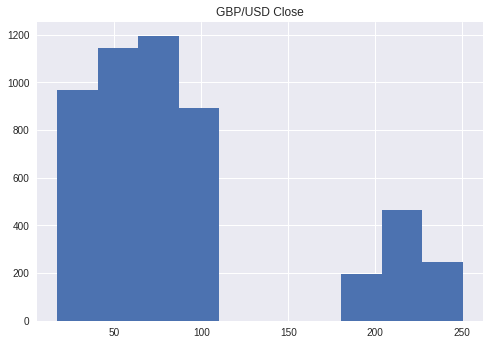

In [7]:
exchangeRatesSeries.hist()

In [8]:
from statsmodels.tsa.arima_model import ARIMA

#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
	model = ARIMA(Actual, order=(P, D, Q))
	model_fit = model.fit(disp=0)
	prediction = model_fit.forecast()[0]
	return prediction

#creating data
ExchangeRates = [[1],[1.5],[2],[4],[6],[8],[16],[1]]

#predict next value
predicted = StartARIMAForecasting(ExchangeRates, 1,1,0)
#display the value
print('Predicted=%f' % (predicted))


/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)


Predicted=15.219305


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [10]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

#get data
def GetData(fileName):
    return read_csv(fileName, header=0, parse_dates=[0], index_col=0).values

#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
	model = ARIMA(Actual, order=(P, D, Q))
	model_fit = model.fit(disp=0)
	prediction = model_fit.forecast()[0]
	return prediction
    
#Get exchange rates
ActualData = GetData('exchange.csv')
#Size of exchange rates
NumberOfElements = len(ActualData)

#Use 70% of data as training, rest 30% to Test model
TrainingSize = int(NumberOfElements * 0.7)
TrainingData = ActualData[0:TrainingSize]
TestData = ActualData[TrainingSize:NumberOfElements]

#new arrays to store actual and predictions
Actual = [x for x in TrainingData]
Predictions = list()


#in a for loop, predict values using ARIMA model
for timepoint in range(len(TestData)):
	ActualValue =  TestData[timepoint]
	#forcast value
	Prediction = StartARIMAForecasting(Actual, 3,1,0)    
	print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
	#add it in the list
	Predictions.append(Prediction)
	Actual.append(ActualValue)

#Print MSE to see how good the model is
Error = mean_squared_error(TestData, Predictions)
print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)
# plot
pyplot.plot(TestData)
pyplot.plot(Predictions, color='red')
pyplot.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Actual=25.703000, Predicted=24.576408
Actual=25.211000, Predicted=25.332256
Actual=25.110000, Predicted=25.111074
Actual=24.872000, Predicted=25.226216
Actual=25.363000, Predicted=24.936629
Actual=25.170000, Predicted=25.239773
Actual=27.179000, Predicted=25.092939
Actual=27.836000, Predicted=26.591634
Actual=27.985000, Predicted=27.171859
Actual=27.105000, Predicted=27.780572
Actual=26.920000, Predicted=27.315173
Actual=26.985000, Predicted=27.143039
Actual=26.249000, Predicted=26.975671
Actual=25.962000, Predicted=26.429683
Actual=25.566000, Predicted=26.183523
Actual=25.989000, Predicted=25.718160
Actual=25.758000, Predicted=25.920293
Actual=25.783000, Predicted=25.706837
Actual=26.084000, Predicted=25.801637
Actual=26.210000, Predicted=25.960353
Actual=27.010000, Predicted=26.080075
Actual=26.853000, Predicted=26.716712
Actual=25.614000, Predicted=26.700090
Actual=25.077000, Predicted=25.999555
Actual=25.090000, Predicted=25.482577
Actual=25.618000, Predicted=25.170893
Actual=25.98

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=28.256000, Predicted=27.386770
Actual=28.991000, Predicted=27.946280
Actual=29.622000, Predicted=28.505863
Actual=30.186000, Predicted=29.260032
Actual=31.594000, Predicted=29.864817
Actual=34.263000, Predicted=31.034181
Actual=34.551000, Predicted=33.142076
Actual=35.404000, Predicted=33.874645
Actual=36.047000, Predicted=35.083069
Actual=35.763000, Predicted=35.653407
Actual=36.540000, Predicted=35.696034
Actual=36.902000, Predicted=36.355518
Actual=38.760000, Predicted=36.606346
Actual=37.996000, Predicted=38.112408
Actual=40.037000, Predicted=37.806887
Actual=41.020000, Predicted=39.585656
Actual=41.008000, Predicted=40.262099
Actual=39.288000, Predicted=40.793834
Actual=40.431000, Predicted=39.795885
Actual=42.954000, Predicted=40.446633
Actual=43.441000, Predicted=41.924940
Actual=44.369000, Predicted=42.738297
Actual=44.281000, Predicted=43.984555
Actual=44.569000, Predicted=44.094124
Actual=43.642000, Predicted=44.492754
Actual=43.493000, Predicted=43.842443
Actual=44.87

NameError: ignored